# **Handwritten Digit Recognition with MLP**

**About This Project:**

This project is a complete implementation of a **Multilayer Perceptron (MLP)** built entirely **from scratch**, without using high-level machine learning libraries such as TensorFlow or PyTorch.  

The purpose of this project is to create a neural network capable of **recognizing handwritten digits** (0–9) and to gain a **deep practical understanding of how MLPs work**, including forward propagation, activation functions, backpropagation, and gradient descent.  

In [38]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [39]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
y = y.astype(int).values

In [40]:
print(X.shape)

(70000, 784)


In [41]:
X = ((X / 255.) - .5) * 2

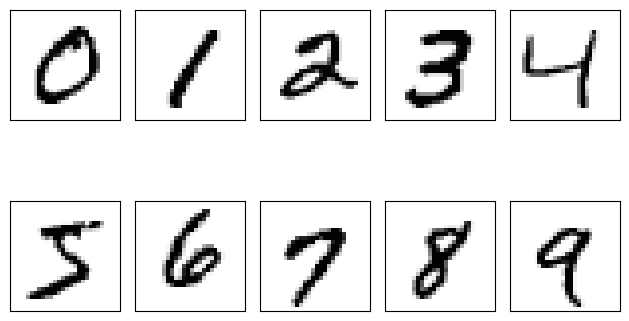

In [42]:
fig, ax = plt.subplots(nrows=2, ncols=5,

                        sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):

     img = X[y == i][0].reshape(28, 28)

     ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [43]:
print(y.shape)

(70000,)


In [44]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=5000,random_state=123, stratify=y_temp )

In [60]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))


def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels), dtype=float)
    for i, val in enumerate(y):
        ary[i, val] = 1.0
    return ary

# **MLP MODEL**

In [73]:
class Multilayer_Perceptron:
    def __init__(self, num_features, num_hidden, num_classes, random_state=42):

        super().__init__()

        self.num_classes = num_classes

        rng = np.random.RandomState(random_state) # Create a random number generator with a fixed seed for reproducibility

        # Initialize hidden layer weights
        self.weight_h = rng.normal(
            loc=0.0, scale=0.1, size=(num_hidden, num_features))
        # Initialized from a normal distribution (mean=0.0, std=0.1)
        
        self.bias_h = np.zeros(num_hidden)
        # Bias vector for hidden layer neurons, initialized to 0

        # Initialize output layer weights

        self.weight_out = rng.normal(
            loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        # weight_out shape: (num_classes, num_hidden)
        # Each output neuron has a weight for each hidden neuron
        
        self.bias_out = np.zeros(num_classes)
        # Bias vector for output layer neurons, initialized to 0
        # Shape: (num_classes,)

    def forward(self, x):

        # Hidden layer

        y_hat = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(y_hat)

         # Output layer

        y_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(y_out)

        return a_h, a_out
    
    def backward(self, x, a_h, a_out,y):

        #########################
        ### Output layer weights
        #########################

        y_onehot = int_to_onehot(y, num_labels=self.num_classes)

        #Part 1: dLoss/dOutWeights

        # input/output dim: [n_examples, n_classes]
        d_loss_d_a_out = 2. *(a_out - y_onehot) / y.shape[0]

        d_a_out_d_z_out = a_out * (1. - a_out)

        delta_out = d_loss_d_a_out*d_a_out_d_z_out

        d_z_out__dw_out = a_h

        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)

        d_loss__db_out = np.sum(delta_out, axis=0)

        # Part 2: dLoss/dHiddenWeights

        # [n_classes, n_hidden]

        d_z_out__a_h = self.weight_out

        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)

        d_a_h__d_z_h = a_h * (1 - a_h)

        d_z_h__d_w_h = x

        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)

        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss__db_out,
        d_loss__d_w_h, d_loss__d_b_h)

In [74]:
model = Multilayer_Perceptron(num_features=28*28,
                              num_hidden=50,
                              num_classes=10)

In [75]:
num_epochs = 50
minibatch_sizes = 100

def minibatch_gen(X, y, minibatch_size):

    indices = np.arange(X.shape[0])

    np.random.shuffle(indices)
    
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]

        yield X[batch_idx], y[batch_idx]

In [76]:
for i in range(num_epochs):

    batch_gen = minibatch_gen(X, y, minibatch_sizes)
    for X_train_mini, y_train_mini in batch_gen:
        break
    break


print(X_train_mini.shape)
print(y_train_mini.shape)

(100, 784)
(100,)


In [77]:
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)

In [78]:
def accuracy1(targets, predicted_labels):
    return np.mean(predicted_labels == targets)

In [79]:
_, probas = model.forward(X_valid)

In [80]:
mse = mse_loss(y_valid, probas)
print(f'Initial validation MSE: {mse:.1f}')

Initial validation MSE: 0.3


In [81]:
predicted_labels = np.argmax(probas, axis=1)
acc = accuracy1(y_valid, predicted_labels)
print(f'Initial validation accuracy: {acc*100:.1f}%')

Initial validation accuracy: 9.8%


# **THE TRAINING LOOP**

In [82]:
def train(model, X_train, y_train, X_valid, y_valid,
          num_epochs=50, minibatch_size=100, learning_rate=0.1,
          verbose=True):
     train_mse_history = []
     train_acc_history = []
     valid_acc_history = []

     for epoch in range(num_epochs):
        # Minibatch loop
        for X_batch, y_batch in minibatch_gen(X_train, y_train, minibatch_size):
            # Forward pass
            a_h, probas = model.forward(X_batch)

            # Backward pass
            d_w_out, d_b_out, d_w_h, d_b_h = model.backward(X_batch, a_h, probas, y_batch)

            # Update weights
            model.weight_h   -= learning_rate * d_w_h
            model.bias_h     -= learning_rate * d_b_h
            model.weight_out -= learning_rate * d_w_out
            model.bias_out   -= learning_rate * d_b_out

        # ---- Metrics evaluation at end of epoch ----
        # Training metrics
        _, train_probas = model.forward(X_train)
        y_train_pred = np.argmax(train_probas, axis=1)
        train_acc = accuracy_score(y_train, y_train_pred)
        train_mse = mean_squared_error(int_to_onehot(y_train, num_labels=model.num_classes),
                                       train_probas)

        # Validation metrics
        _, val_probas = model.forward(X_valid)
        y_val_pred = np.argmax(val_probas, axis=1)
        val_acc = accuracy_score(y_valid, y_val_pred)

        # Store metrics
        train_mse_history.append(train_mse)
        train_acc_history.append(train_acc*100)
        valid_acc_history.append(val_acc*100)

        # Print epoch summary
        if verbose:
            print(f"Epoch {epoch+1}/{num_epochs} | "
                  f"Train MSE: {train_mse:.4f} | "
                  f"Train Acc: {train_acc*100:.2f}% | "
                  f"Valid Acc: {val_acc*100:.2f}%")
     return train_mse_history, train_acc_history, valid_acc_history

In [83]:
np.random.seed(123)
epoch_loss, epoch_train_acc, epoch_valid_acc = train(
    model, X_train, y_train, X_valid, y_valid,
    num_epochs=50, learning_rate=0.1)

Epoch 1/50 | Train MSE: 0.0531 | Train Acc: 71.63% | Valid Acc: 71.44%
Epoch 2/50 | Train MSE: 0.0328 | Train Acc: 85.51% | Valid Acc: 84.94%
Epoch 3/50 | Train MSE: 0.0248 | Train Acc: 88.35% | Valid Acc: 87.72%
Epoch 4/50 | Train MSE: 0.0210 | Train Acc: 89.43% | Valid Acc: 89.24%
Epoch 5/50 | Train MSE: 0.0188 | Train Acc: 90.21% | Valid Acc: 89.84%
Epoch 6/50 | Train MSE: 0.0174 | Train Acc: 90.71% | Valid Acc: 90.30%
Epoch 7/50 | Train MSE: 0.0164 | Train Acc: 91.04% | Valid Acc: 90.50%
Epoch 8/50 | Train MSE: 0.0155 | Train Acc: 91.27% | Valid Acc: 90.84%
Epoch 9/50 | Train MSE: 0.0150 | Train Acc: 91.51% | Valid Acc: 91.30%
Epoch 10/50 | Train MSE: 0.0143 | Train Acc: 91.94% | Valid Acc: 91.52%
Epoch 11/50 | Train MSE: 0.0139 | Train Acc: 92.05% | Valid Acc: 91.72%
Epoch 12/50 | Train MSE: 0.0135 | Train Acc: 92.29% | Valid Acc: 91.94%
Epoch 13/50 | Train MSE: 0.0131 | Train Acc: 92.47% | Valid Acc: 92.14%
Epoch 14/50 | Train MSE: 0.0128 | Train Acc: 92.69% | Valid Acc: 92.38%
E

**Evaluating Our Predictions**

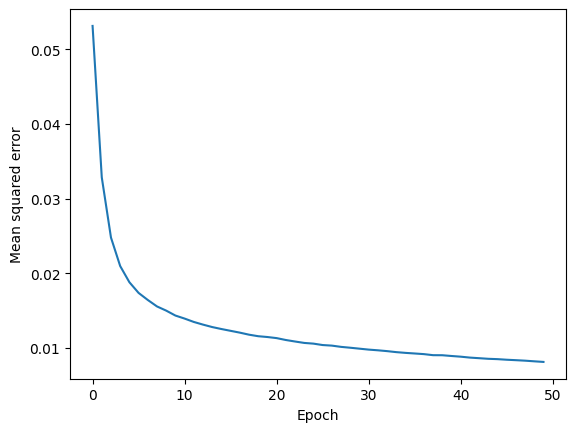

In [85]:
import matplotlib.pyplot as plt

plt.plot(range(len(epoch_loss)), epoch_loss)
plt.ylabel('Mean squared error')
plt.xlabel('Epoch')
plt.show()

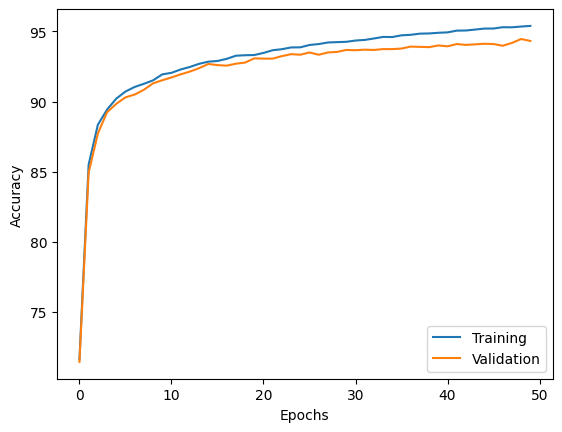

In [86]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,

          label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,

          label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()


# **TEST SET EVALUATION**

In [87]:
_, probas = model.forward(X_test)

# Predictions
y_pred = np.argmax(probas, axis=1)

# Accuracy
acc = accuracy_score(y_test, y_pred)

# MSE (compare raw probabilities to one-hot labels)
y_onehot = np.zeros((y_test.shape[0], model.num_classes))
y_onehot[np.arange(y_test.shape[0]), y_test] = 1

mse_val = mean_squared_error(y_onehot, probas)

# Print results
print(f"Test MSE: {mse_val:.4f}")
print(f"Test Accuracy: {acc*100:.2f}%")

Test MSE: 0.0092
Test Accuracy: 94.57%
